In [1]:
import numpy as np
from sklearn.decomposition import PCA
import cv2 as cv2
import matplotlib.pyplot as plt
from copy import deepcopy

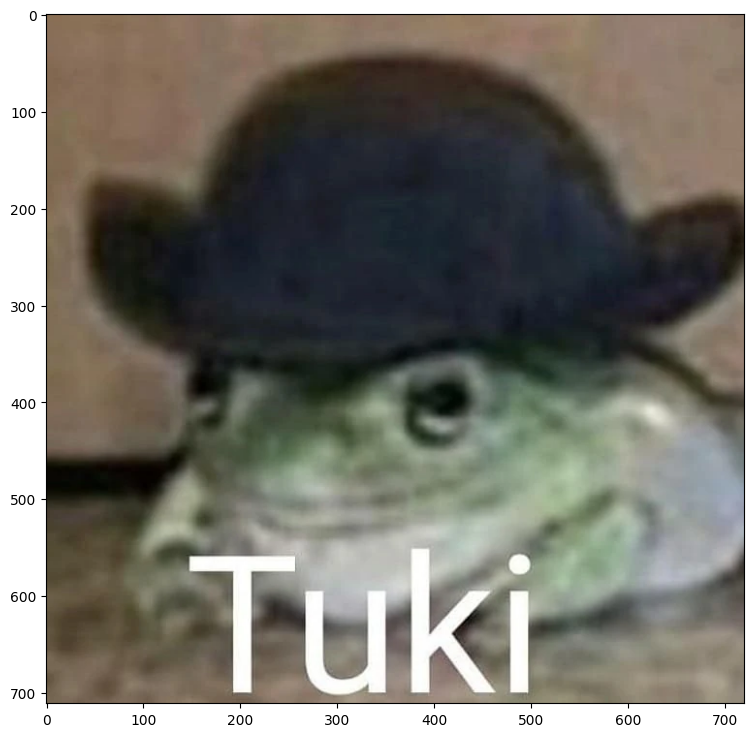

In [2]:
img_original = cv2.imread('tuki.png')
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (9,9))
plt.imshow(img_original)

In [3]:
img_unrolled = np.reshape(img_original, newshape=(-1, 3))
img_unrolled.shape

(511920, 3)

In [4]:
pca = PCA(3)
pca.fit(img_unrolled)
pca_transformed_data = pca.transform(img_unrolled)

[0.97655183 0.01995591 0.00349226]


([<matplotlib.axis.XTick at 0x2859f19b0d0>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

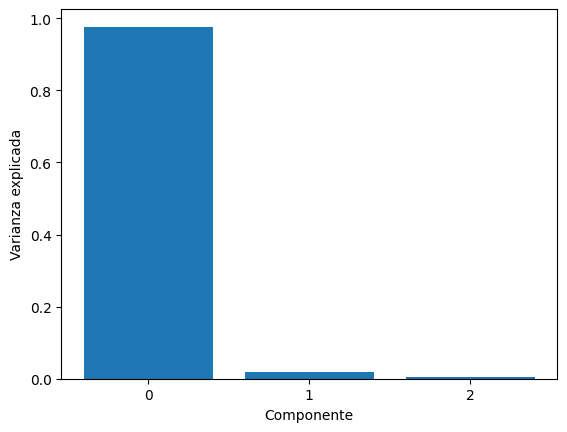

In [7]:
print( pca.explained_variance_ratio_)
plt.bar([0,1,2], pca.explained_variance_ratio_)
plt.ylabel('Varianza explicada')
plt.xlabel('Componente')
plt.xticks([0,1,2])

In [8]:
pca.components_ #Cada fila es un componente

array([[ 0.60150474,  0.58960514,  0.53903417],
       [-0.70722871,  0.07922748,  0.70253153],
       [-0.37150988,  0.80379649, -0.46464138]])

Text(0, 0.5, 'PC2')

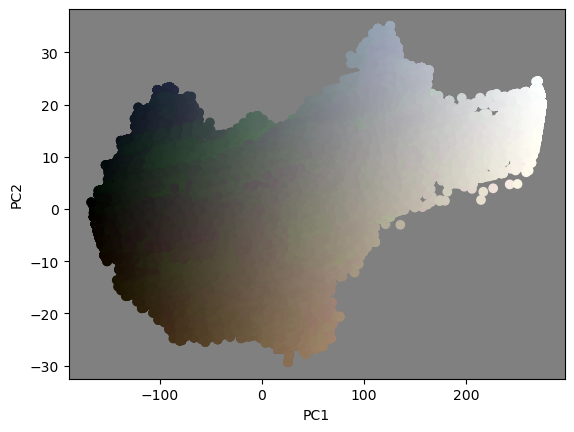

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, facecolor = 'gray')
plt.scatter(pca_transformed_data[:,0], pca_transformed_data[:,1], c = img_unrolled/255)
plt.xlabel('PC1')
plt.ylabel('PC2')

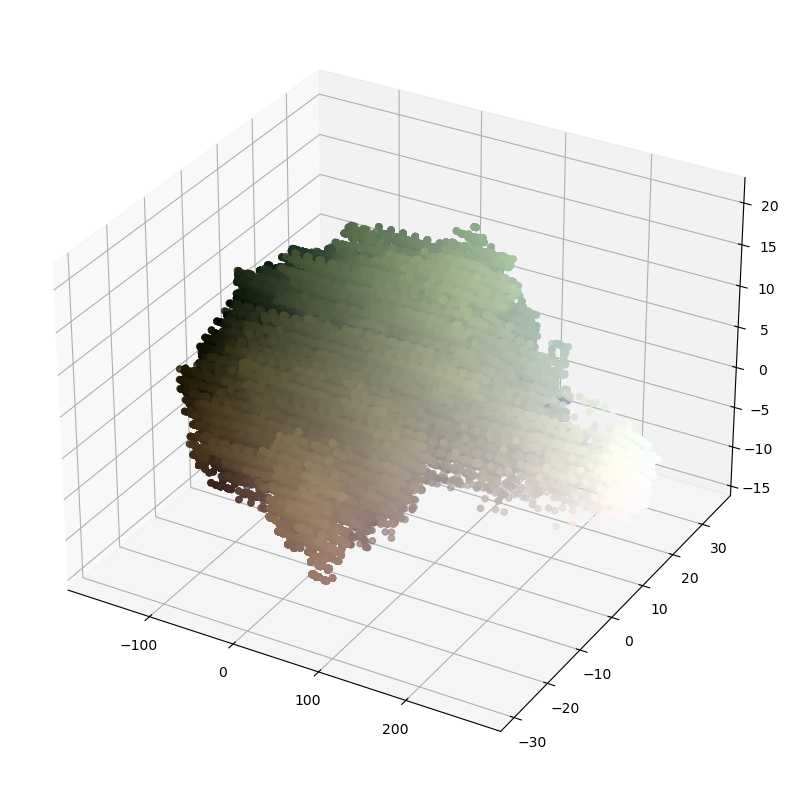

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_transformed_data[:,0], pca_transformed_data[:,1], pca_transformed_data[:,2], c = img_unrolled/255)

Text(0.5, 0, 'B')

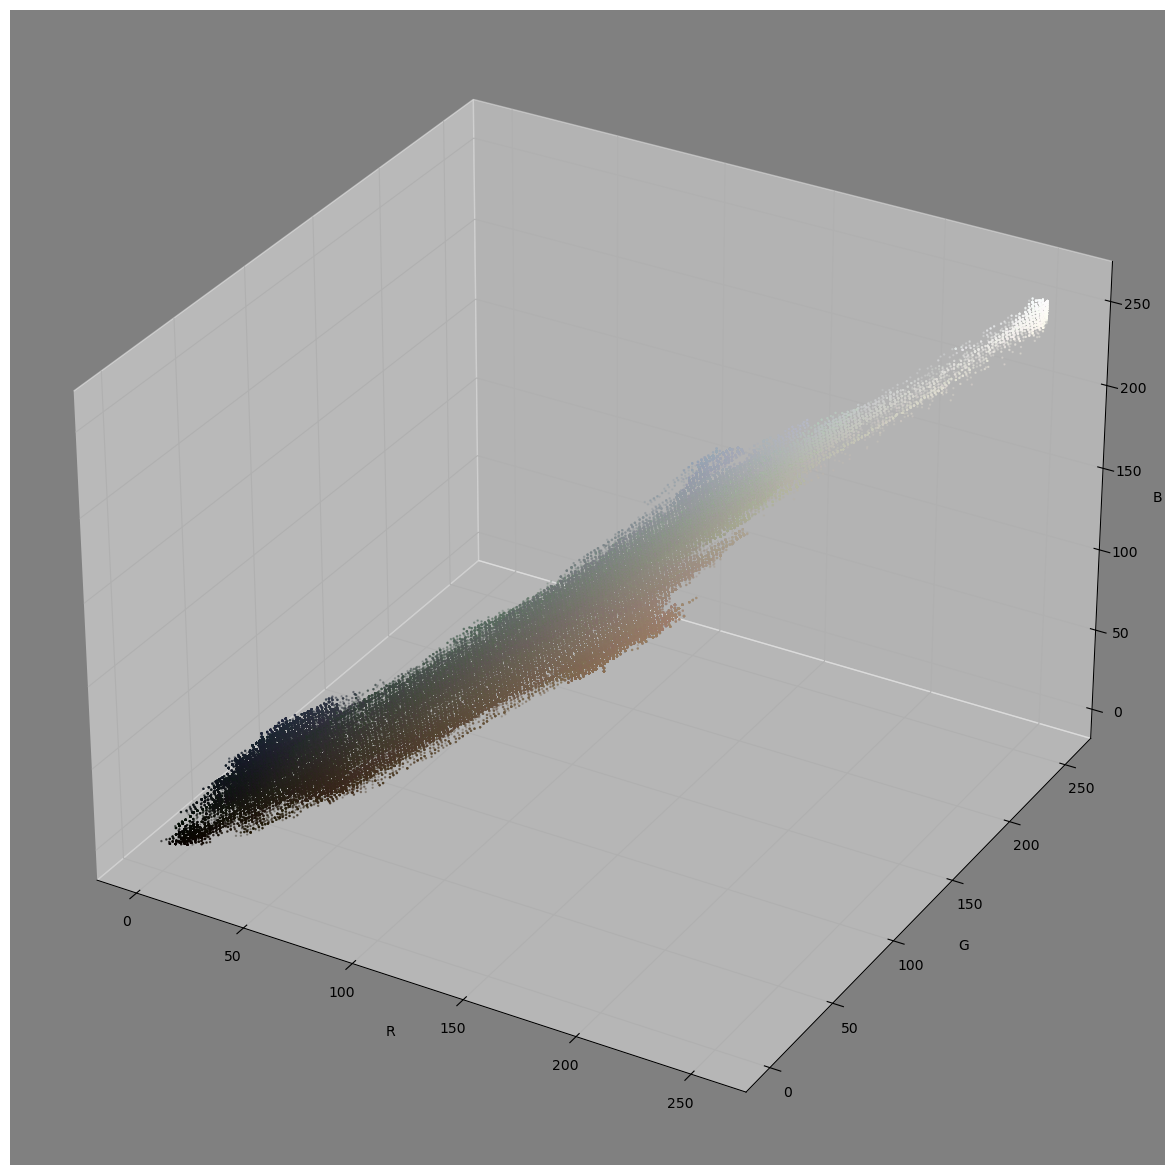

In [12]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d', facecolor = 'gray')
ax.scatter(img_unrolled[:,0], img_unrolled[:,1], img_unrolled[:,2], c = img_unrolled/255, marker='.', s = 2, alpha = 0.3)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

In [9]:
pca_cut = deepcopy(pca_transformed_data)
pca_cut[:,[1,2]] = 0 #Seteo a cero los componentes que no quiero
pca_reconstructed = pca.inverse_transform(pca_cut)
pca_cut

array([[26.10226225,  0.        ,  0.        ],
       [26.10226225,  0.        ,  0.        ],
       [26.10226225,  0.        ,  0.        ],
       ...,
       [60.47073114,  0.        ,  0.        ],
       [58.74058709,  0.        ,  0.        ],
       [56.47140889,  0.        ,  0.        ]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


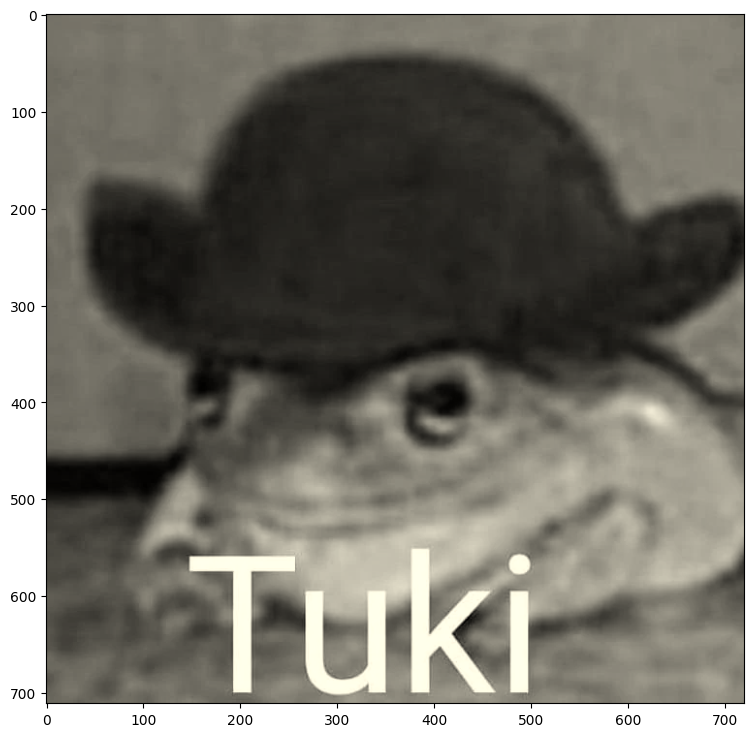

In [10]:
plt.figure(figsize = (9,9))
plt.imshow(np.reshape(pca_reconstructed/255, newshape=img_original.shape)) #/255 pq le gusta rango 0-1